# Capstone II - Exploratory Data Analysis - TP

## Avocado Data Set - Description

- The data set is from the Hass Avocado Board website in May 2018 and compiled into a single CSV. 

- The data set represents weekly 2018 retail scan data for National retail volume (units) and price.   Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass   avocados. 

- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet   reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and   military. 

- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when       multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only   for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

- Columns in the dataset:
 * Date - The date of the observation
 * AveragePrice - the average price of a single avocado
 * type - conventional or organic
 * year - the year
 * Region - the city or region of the observation
 * Total Volume - Total number of avocados sold
 * 4046 - Total number of avocados with PLU 4046 sold
 * 4225 - Total number of avocados with PLU 4225 sold
 * 4770 - Total number of avocados with PLU 4770 sold


## <span style="color:blue">STEP 1. DATA CLEANSING AND PREPARATION</span>

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline   
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as datetime
import statsmodels.api as sm 

In [2]:
# Import Data
df = pd.read_csv("C:/Users/tania/AvocadoDataSet.csv", header=0)
del df['KEY']   
df.rename(columns={'Total Volume': 'UNIT_VOLUME'}, inplace=True)
df.head()

,Date,AveragePrice,UNIT_VOLUME,4046_SM,4225_L,4770_XL,TTL_BAGS,SM_BAGS,L_BAGS,XL_BAGS,type,year,CITY,STATE,MKT
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,NY,Northeast
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,NY,Northeast
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,NY,Northeast
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,NY,Northeast
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NY,Northeast


In [3]:
# Find row/column count & identify null values
print(df.shape)
print(df.isnull().sum().sum())
#print(df.head(3))
#Identify null values
#print(df.describe)
#print(df.info)

(18249, 15)
0


In [4]:
# Convert the Date column to datetime format
from datetime import datetime
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Y_M'] = df['Date'].dt.strftime('%Y-%m')
df['Y'] = df['Date'].dt.strftime('%Y')
df['M'] = df['Date'].dt.strftime('%m')

In [5]:
# Add the single Haas Avocado sizes to compare against TLL_BAGS
sum_column = df['4046_SM'] + df['4225_L'] + df['4770_XL']
df['TTL_SINGLE'] = sum_column
# Add dollar volume
dollar_sales = df['UNIT_VOLUME'] * df['AveragePrice']
df['DOLLAR_VOLUME'] = dollar_sales
df.head()

,Date,AveragePrice,UNIT_VOLUME,4046_SM,4225_L,4770_XL,TTL_BAGS,SM_BAGS,L_BAGS,XL_BAGS,type,year,CITY,STATE,MKT,Y_M,Y,M,TTL_SINGLE,DOLLAR_VOLUME
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,NY,Northeast,2015-12,2015,12,55539.75,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,NY,Northeast,2015-12,2015,12,45371.42,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,NY,Northeast,2015-12,2015,12,110074.87,109944.8046
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,NY,Northeast,2015-12,2015,12,73180.99,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NY,Northeast,2015-11,2015,11,44855.65,65330.6880


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18249 non-null  datetime64[ns]
 1   AveragePrice   18249 non-null  float64       
 2   UNIT_VOLUME    18249 non-null  float64       
 3   4046_SM        18249 non-null  float64       
 4   4225_L         18249 non-null  float64       
 5   4770_XL        18249 non-null  float64       
 6   TTL_BAGS       18249 non-null  float64       
 7   SM_BAGS        18249 non-null  float64       
 8   L_BAGS         18249 non-null  float64       
 9   XL_BAGS        18249 non-null  float64       
 10  type           18249 non-null  object        
 11  year           18249 non-null  int64         
 12  CITY           18249 non-null  object        
 13  STATE          18249 non-null  object        
 14  MKT            18249 non-null  object        
 15  Y_M            1824

In [7]:
# Identify unique values in select columns 
# 2018 has only 3 months of data. Will use 2015-2017 
# Pull out TotalUS and REGION markets when analyzing to avoid double counting
uniqueValues = (df['year'].append(df['type'].append(df['MKT']))).unique()
print(uniqueValues)

[2015 2016 2017 2018 'conventional' 'organic' 'Northeast' 'Southeast'
 'West' 'REGION' 'GreatLakes' 'Plains' 'California' 'Midsouth' 'TOTALUS']


In [8]:
# Idenifying which region has highest unit volume. Sort by total single avocados
filt1 = df[df.MKT != 'REGION'] 
filt2 = filt1[['UNIT_VOLUME','DOLLAR_VOLUME','TTL_SINGLE', '4046_SM','4225_L','4770_XL','MKT']]
filt2.groupby(['MKT']).sum().sort_values('TTL_SINGLE', ascending=False)

,UNIT_VOLUME,DOLLAR_VOLUME,TTL_SINGLE,4046_SM,4225_L,4770_XL
MKT,,,,,,
TOTALUS,5.864740e+09,6.387593e+09,4.226123e+09,2.054936e+09,2.015012e+09,1.561752e+08
California,8.086824e+08,8.583975e+08,5.932020e+08,3.155503e+08,2.557224e+08,2.192929e+07
Plains,6.950115e+08,6.087289e+08,5.040732e+08,3.208356e+08,1.678839e+08,1.535368e+07
Northeast,6.245443e+08,8.077665e+08,4.525940e+08,7.469645e+07,3.680434e+08,9.854233e+06
Southeast,5.092877e+08,5.949473e+08,3.560154e+08,2.483859e+08,9.773238e+07,9.897169e+06
West,4.997651e+08,4.638074e+08,3.309543e+08,1.907601e+08,1.316455e+08,8.548700e+06
GreatLakes,3.802851e+08,4.516003e+08,2.657189e+08,6.118169e+07,1.680607e+08,3.647656e+07
Midsouth,2.763462e+08,3.709222e+08,1.953849e+08,2.582821e+07,1.671644e+08,2.392331e+06


## <span style="color:blue">STEP 2. INSIGHTS</span>

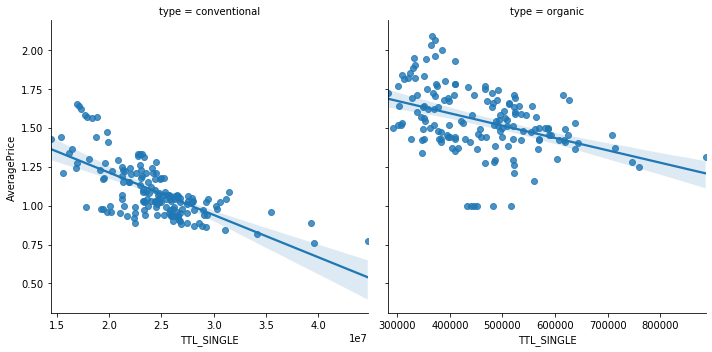

In [9]:
# Create a lineplot 
# Apply Filters (Select Total US and remove 2018)
filt_MKT = df[df['MKT'] == 'TOTALUS']
filt = filt_MKT[['TTL_SINGLE','AveragePrice','type','MKT','Y','Y_M','M']]
sns.lmplot(x='TTL_SINGLE', y='AveragePrice', col='type', sharex=False, sharey=True, data=filt.query("Y != '2018'"))

#### Observations: Conventional single avocaddos are inelastic and organic are elastic

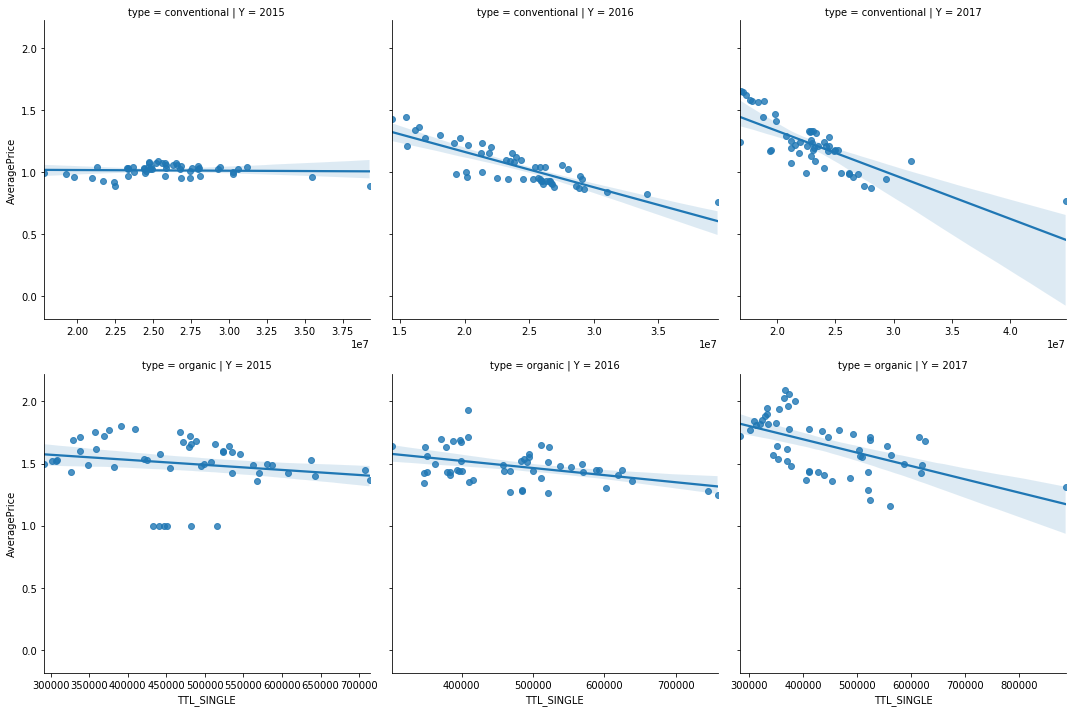

In [10]:
# Create Regression Plot 
sns.lmplot(x='TTL_SINGLE', y='AveragePrice', row='type',col='Y', palette = 'dark', sharex=False, sharey=True, data=filt.query("Y != '2018'"))

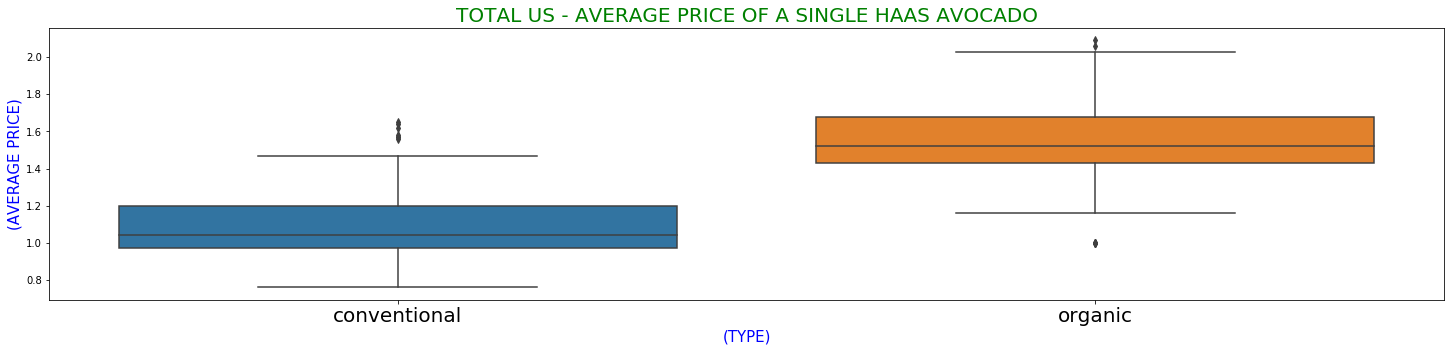

In [11]:
#Creat a boxplot by avocado type
plt.rcParams['figure.figsize'] = (25,5)
filt1 = sns.boxplot(x='type', y='AveragePrice', data=filt.query("Y != '2018'"))
# Labels
plt.xlabel('(TYPE)', fontsize=15, color='blue')
plt.ylabel('(AVERAGE PRICE)', fontsize=15, color = 'blue')  
plt.title('TOTAL US - AVERAGE PRICE OF A SINGLE HAAS AVOCADO', fontsize=20, color = 'green')
plt.xticks(fontsize=20)
plt.yticks()
plt.show()

#### Observations: Organic Hass Avocados cost more than conventional

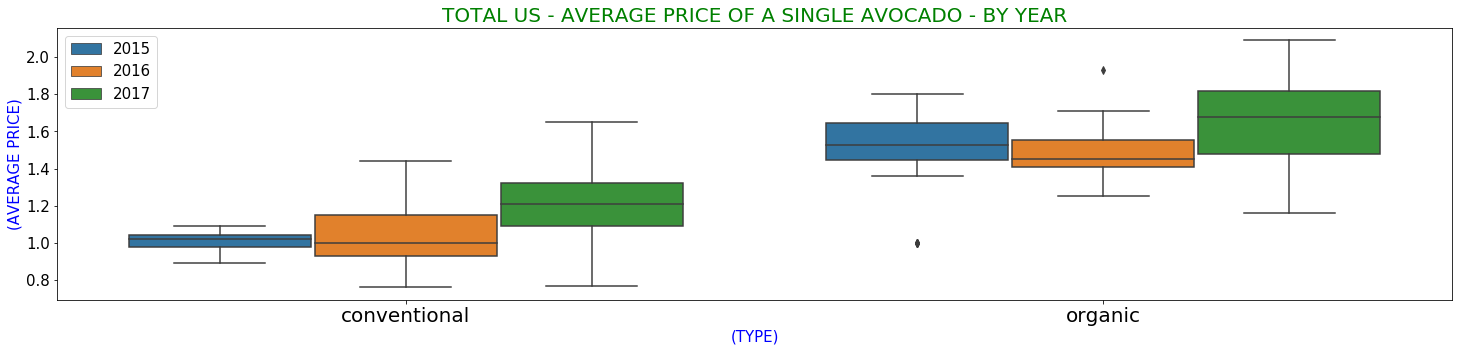

In [12]:
# Create a boxplot by year 
plt.rcParams['figure.figsize'] = (25,5)
filt1 = sns.boxplot(x='type', y='AveragePrice', hue='Y', data=filt.query("Y != '2018'"))
# Labels
plt.xlabel('(TYPE)', fontsize=15, color='blue')
plt.ylabel('(AVERAGE PRICE)', fontsize=15, color = 'blue')  
plt.title('TOTAL US - AVERAGE PRICE OF A SINGLE AVOCADO - BY YEAR', fontsize=20, color = 'green')
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.legend(loc ='upper left', fontsize = 15)
plt.show()


#### Obeservations: In 2017, it appears the organic and conventional pricing were similar in some markets.

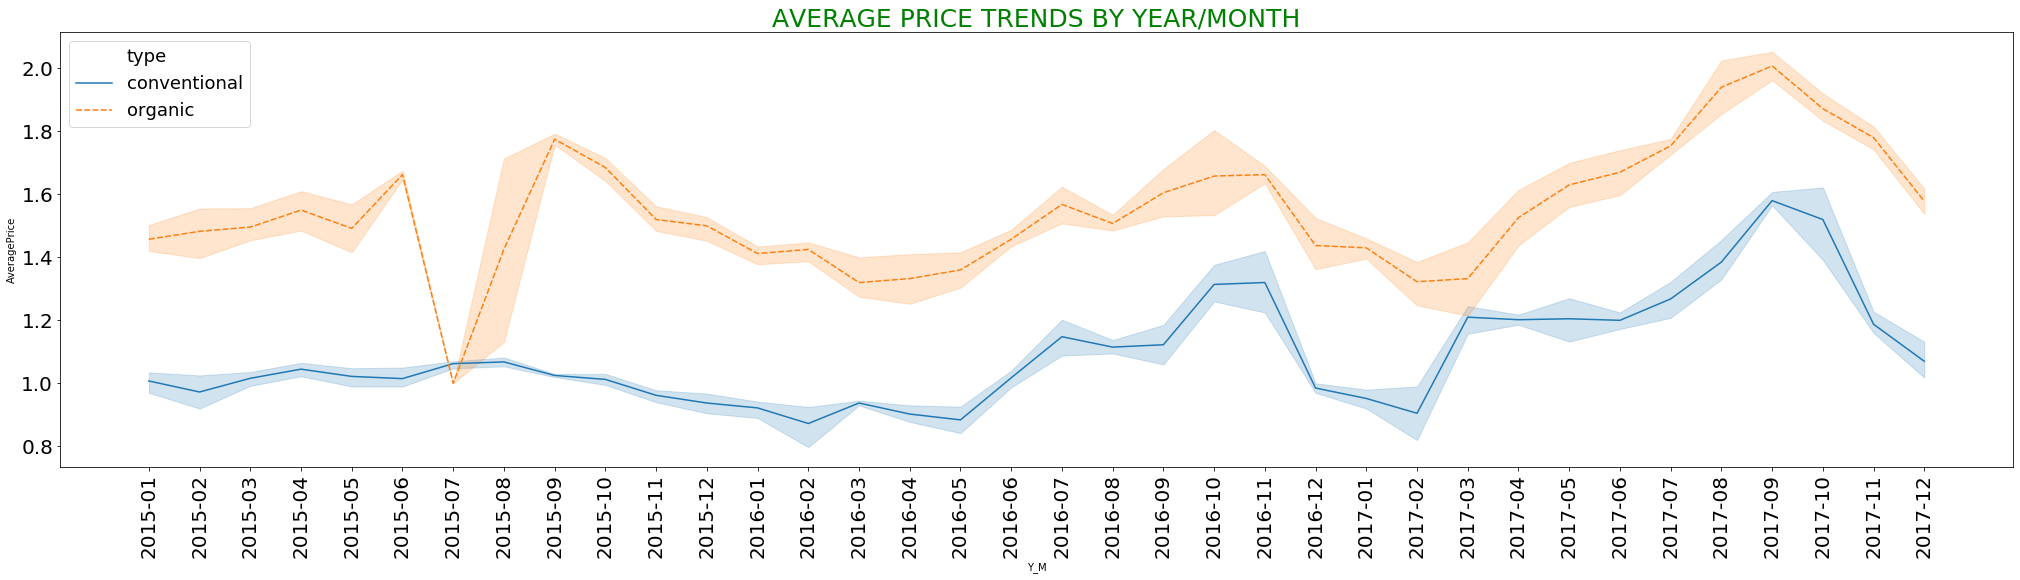

In [13]:
plt.rcParams['figure.figsize'] = (35,8)
sns.lineplot(x='Y_M', y='AveragePrice',hue='type', style='type', data=filt.query("Y != '2018'"))
plt.legend(loc='upper left',fontsize=18)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.title('AVERAGE PRICE TRENDS BY YEAR/MONTH', fontsize=25, color='green')
sns.set_context("paper", rc={"axes.labelsize":18})

#### Observations: Average price is lower in the summer months

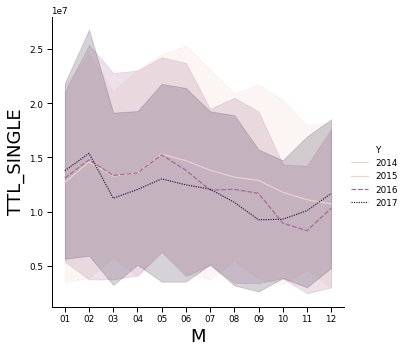

In [14]:
#plt.rcParams['figure.figsize'] = (50,7)
sns.relplot(x="M", y="TTL_SINGLE",
                 hue="Y", style='Y',  
                 kind='line', data=filt.query("Y != '2018'"))

#### Observations: Peak sales of single avoados are in May

## <span style="color:RED">PRACTICE</span>

#### Price does not appear to be strongly correlated with the other variables

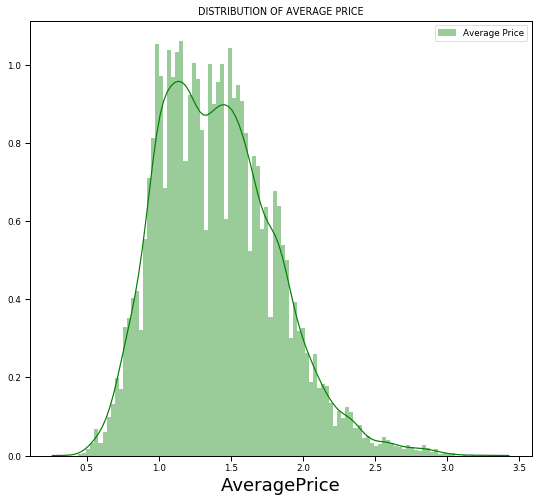

In [15]:
# Distribution of Average Price
plt.figure(figsize=(9,8))
sns.distplot(df['AveragePrice'],color = 'g',label='Average Price', bins =100, hist_kws={'alpha':0.40});
plt.title('DISTRIBUTION OF AVERAGE PRICE')
plt.legend()

In [16]:
df_num = df.select_dtypes(include=['float64','int64'])
print(df_num)

       AveragePrice  UNIT_VOLUME  4046_SM     4225_L  4770_XL  TTL_BAGS  \
0              1.33     64236.62  1036.74   54454.85    48.16   8696.87   
1              1.35     54876.98   674.28   44638.81    58.33   9505.56   
2              0.93    118220.22   794.70  109149.67   130.50   8145.35   
3              1.08     78992.15  1132.00   71976.41    72.58   5811.16   
4              1.28     51039.60   941.48   43838.39    75.78   6183.95   
...             ...          ...      ...        ...      ...       ...   
18244          1.63     17074.83  2046.96    1529.20     0.00  13498.67   
18245          1.71     13888.04  1191.70    3431.50     0.00   9264.84   
18246          1.87     13766.76  1191.92    2452.79   727.94   9394.11   
18247          1.93     16205.22  1527.63    2981.04   727.01  10969.54   
18248          1.62     17489.58  2894.77    2356.13   224.53  12014.15   

        SM_BAGS  L_BAGS  XL_BAGS  year  TTL_SINGLE  DOLLAR_VOLUME  
0       8603.62   93.25      0.

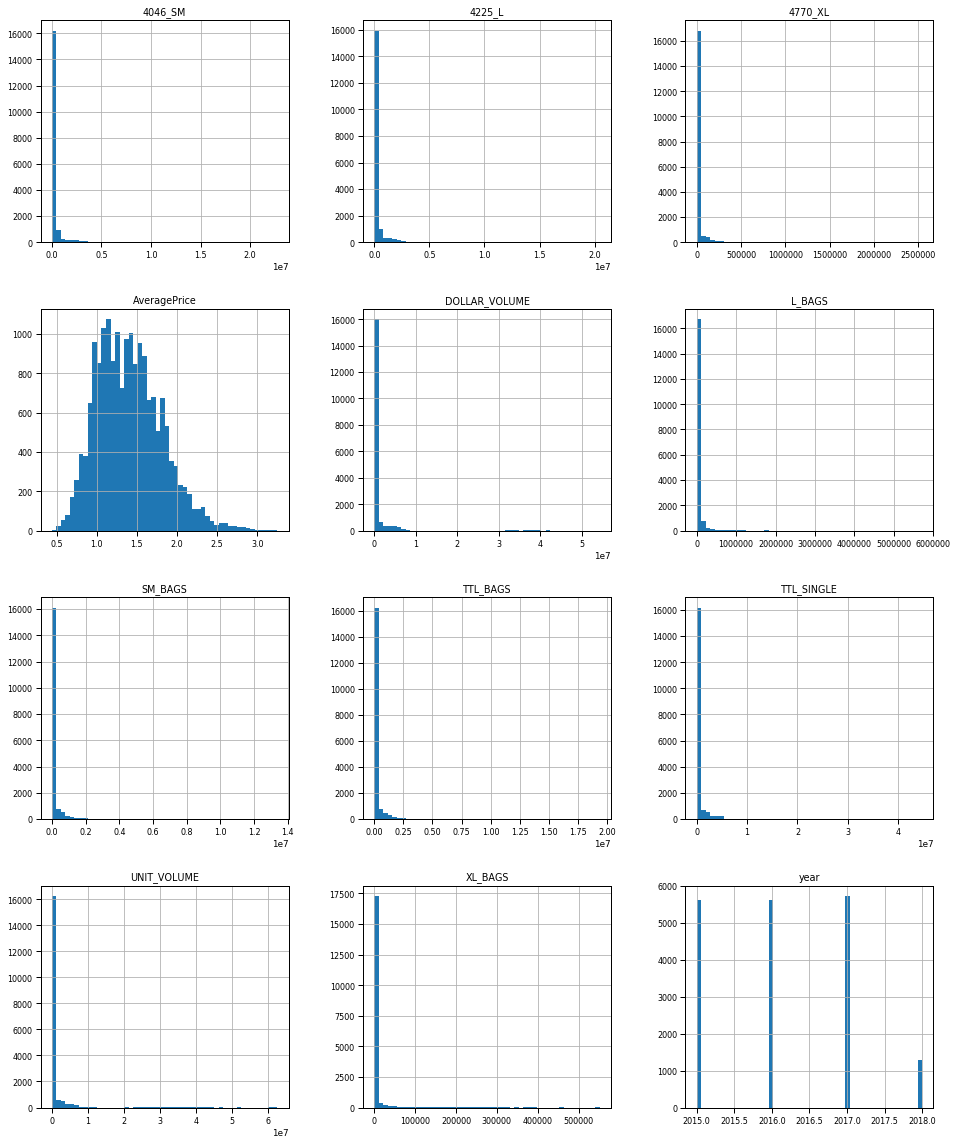

In [17]:
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8, ylabelsize=8);

In [18]:
df_num_corr = df_num.corr()['AveragePrice'][:-1]
corr_list = df_num_corr[abs(df_num_corr)> 0.5].sort_values(ascending=False)
print('There are {} strongly correlated values with Average Price:\n{}'.format(len(corr_list),corr_list))

There are 1 strongly correlated values with Average Price:
AveragePrice    1.0
Name: AveragePrice, dtype: float64


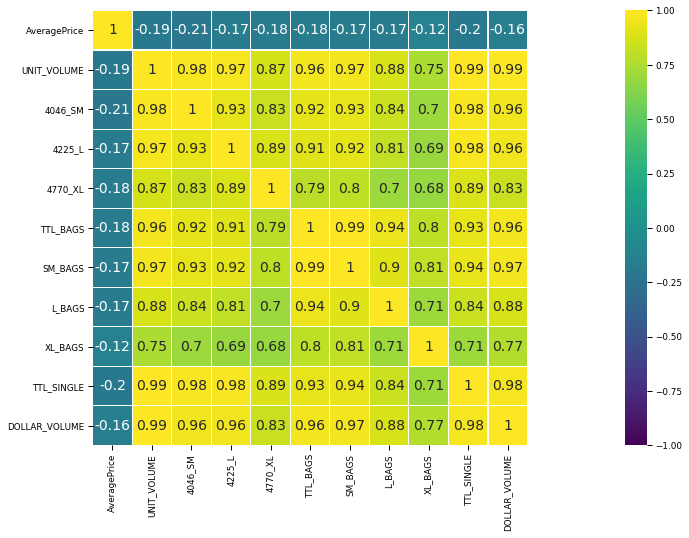

In [19]:
#df.set_index('AveragePrice', inplace =True)
corr= df_num.drop('year', axis = 1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.4)],
            cmap='viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws= {'size':14}, square = True);

In [20]:
# Price Elasticity of Demand 
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
# TO DO - Filter by type. Write observations

df_model = ols("TTL_SINGLE ~ AveragePrice", data=df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:             TTL_SINGLE   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     721.4
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          6.89e-156
Time:                        04:04:03   Log-Likelihood:            -2.9451e+05
No. Observations:               18249   AIC:                         5.890e+05
Df Residuals:                   18247   BIC:                         5.890e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.325e+06   6.64e+04     35.024   

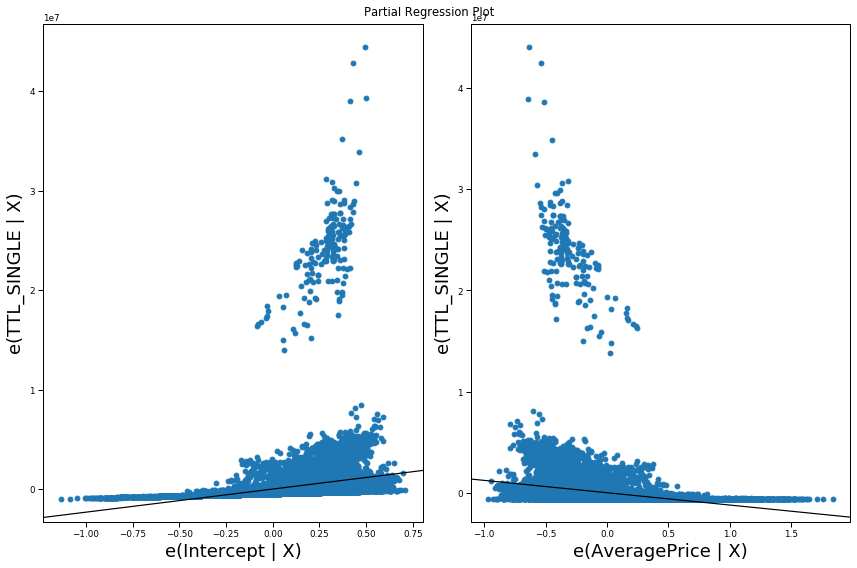

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(df_model, fig=fig)